### Импортим библеотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from python_modules import preprocess
%matplotlib inline
pd.set_option('chained_assignment',None)

### Считываем датасет

In [3]:
import os
datasets = []
for filename in os.listdir("datasets"):
   with open(os.path.join("datasets/", filename), 'r', encoding='utf-8') as f:
       df = pd.read_json(f, encoding='utf-8')
       df['industry'] = [filename for _ in range(df.shape[0])]
       datasets.append(df)


In [4]:
datasets[0].head()

,id,premium,name,department,has_test,response_letter_required,salary,address,employer,snippet,...,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,is_adv_vacancy,industry
0,97975547,False,Исполнительный директор,None,False,False,"{'from': 700000, 'to': None, 'currency': 'RUR'...",None,{'trusted': True},{'requirement': 'высшее образование . -опыт ра...,...,[],[],[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
1,98492552,False,Генеральный директор,None,False,False,"{'from': 400000, 'to': None, 'currency': 'RUR'...",None,{'trusted': False},{'requirement': 'Знания и навыки управления вс...,...,[],[],[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
2,98483027,False,Оператор БПЛА,None,False,False,"{'from': 100000, 'to': 200000, 'currency': 'RU...",None,{'trusted': True},{'requirement': 'Опыт пилотирования БПЛА самол...,...,[],[],[],False,"[{'id': '40', 'name': 'Другое'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
3,97338839,False,Senior java разработчик,None,False,False,"{'from': None, 'to': 570000, 'currency': 'RUR'...",None,{'trusted': True},{'requirement': 'Опыт разработки на Java не ме...,...,[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
4,98489422,False,Веб-аналитик (обучим сами),None,False,True,"{'from': 50000, 'to': 50000, 'currency': 'RUR'...",None,{'trusted': True},{'requirement': 'Быть увлеченным своим ростом ...,...,[],[],[],True,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."


Теперь надо сделать препроцесс фич и разбить более комплексные фичи на мелкие, так в колонке address есть нужная информация для станций метро.

### Предварительная обработка

In [5]:
for dataset in datasets:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         2000 non-null   int64 
 1   premium                    2000 non-null   bool  
 2   name                       2000 non-null   object
 3   department                 82 non-null     object
 4   has_test                   2000 non-null   bool  
 5   response_letter_required   2000 non-null   bool  
 6   salary                     2000 non-null   object
 7   address                    1016 non-null   object
 8   employer                   2000 non-null   object
 9   snippet                    2000 non-null   object
 10  schedule                   2000 non-null   object
 11  working_days               2000 non-null   object
 12  working_time_intervals     2000 non-null   object
 13  working_time_modes         2000 non-null   object
 14  accept_t

Видно что поле 'department' имеет малое количество вакансий, значит надо избавиться от него. Поля id, name, snippet являются излишними и не нужными в анализе и обучении модели

In [6]:
for dataset in datasets:
    dataset.drop(columns=["department", "id", "name", "snippet"], inplace=True)

In [7]:
datasets[0].head()

,premium,has_test,response_letter_required,salary,address,employer,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,is_adv_vacancy,industry
0,False,False,False,"{'from': 700000, 'to': None, 'currency': 'RUR'...",None,{'trusted': True},"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
1,False,False,False,"{'from': 400000, 'to': None, 'currency': 'RUR'...",None,{'trusted': False},"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
2,False,False,False,"{'from': 100000, 'to': 200000, 'currency': 'RU...",None,{'trusted': True},"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '40', 'name': 'Другое'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
3,False,False,False,"{'from': None, 'to': 570000, 'currency': 'RUR'...",None,{'trusted': True},"{'id': 'fullDay', 'name': 'Полный день'}",[],[],[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."
4,False,False,True,"{'from': 50000, 'to': 50000, 'currency': 'RUR'...",None,{'trusted': True},"{'id': 'remote', 'name': 'Удаленная работа'}",[],[],[],True,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",False,"industry(Информационные технологии, системная ..."


In [8]:
# упрощение столбцов и сохранение атомарных признаков
for dataset in datasets:
    dataset["salary"] = dataset["salary"].apply(preprocess.get_net_salary)
    dataset["schedule"] = dataset["schedule"].apply(lambda x: x["name"])
    dataset["experience"] = dataset["experience"].apply(lambda x: x["name"])
    dataset["employment"] = dataset["employment"].apply(lambda x: x["name"])
    dataset["employer"] = dataset["employer"].apply(lambda x: x["trusted"])
    dataset.rename(columns={"employer": "trusted_employer"}, inplace=True)
    dataset["industry"] = dataset["industry"].apply(lambda x: x[9:-6])

In [9]:
# считывание станций метро в Москве
stations = np.load("src_files/stations.npy")

In [10]:
# получение признаков из адреса: долгота, широта, количество ближайших станций и расстояние до ближайшей станции.
for dataset in datasets:
    dataset[["stations_within_km", "distance_to_the_nearest(m)"]] = dataset["address"].apply(lambda x: pd.Series(preprocess.get_stations_count_and_distance_to_nearest(x, stations)))
    dataset[["lat", "lon"]] = dataset["address"].apply(lambda x: pd.Series((x["lat"], x["lng"]) if x is not None else (None, None)))

In [11]:
# удаление адреса и профессиональных ролей, так как они теперь избыточны.
for dataset in datasets:
    dataset.drop(columns=["address"], inplace=True)
    dataset.drop(columns=["professional_roles"], inplace=True)

In [12]:
datasets[0].head()

,premium,has_test,response_letter_required,salary,trusted_employer,schedule,working_days,working_time_intervals,working_time_modes,accept_temporary,accept_incomplete_resumes,experience,employment,is_adv_vacancy,industry,stations_within_km,distance_to_the_nearest(m),lat,lon
0,False,False,False,700000.0,True,Полный день,[],[],[],False,False,Более 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
1,False,False,False,348000.0,False,Полный день,[],[],[],False,False,Более 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
2,False,False,False,150000.0,True,Полный день,[],[],[],False,False,Нет опыта,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
3,False,False,False,495900.0,True,Полный день,[],[],[],False,False,От 3 до 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
4,False,False,True,50000.0,True,Удаленная работа,[],[],[],True,False,Нет опыта,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN


Есть 3 колонки которые могут быть очень полезны для анализа, но достаточно ли там непустых значений?

In [13]:
datasets[0]["working_days"].value_counts()

working_days
[]                                                                          1988
[{'id': 'only_saturday_and_sunday', 'name': 'Работа только по сб и вс'}]      12
Name: count, dtype: int64

In [14]:
datasets[0]["working_time_intervals"].value_counts()

working_time_intervals
[]                                                                                                   1910
[{'id': 'from_four_to_six_hours_in_a_day', 'name': 'Можно работать сменами по 4–6 часов в день'}]      90
Name: count, dtype: int64

In [15]:
datasets[0]["working_time_modes"].value_counts()

working_time_modes
[]                                                                                1939
[{'id': 'start_after_sixteen', 'name': 'Можно начинать работать после 16:00'}]      61
Name: count, dtype: int64

Большинство не имеет данного описания, удаляем эти колонки

In [16]:
# удаление трех столбцов, так как они в основном состоят из пустых значений.
for dataset in datasets:
    dataset.drop(columns=["working_time_modes", "working_time_intervals", "working_days"], inplace=True)

In [17]:
datasets[0].head()

,premium,has_test,response_letter_required,salary,trusted_employer,schedule,accept_temporary,accept_incomplete_resumes,experience,employment,is_adv_vacancy,industry,stations_within_km,distance_to_the_nearest(m),lat,lon
0,False,False,False,700000.0,True,Полный день,False,False,Более 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
1,False,False,False,348000.0,False,Полный день,False,False,Более 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
2,False,False,False,150000.0,True,Полный день,False,False,Нет опыта,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
3,False,False,False,495900.0,True,Полный день,False,False,От 3 до 6 лет,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN
4,False,False,True,50000.0,True,Удаленная работа,True,False,Нет опыта,Полная занятость,False,"Информационные технологии, системная интеграци...",NaN,NaN,NaN,NaN


В нашем датасете присутствуют вакансии, у которых либо отсутствует адрес, либо они находятся за пределами административных районов Москвы. Однако стоит учитывать, что некоторые из этих вакансий предназначены для удаленной работы, поэтому отсутствие офиса не является необычным явлением. Следовательно, мы должны сохранить такие вакансии в датасете, поскольку жители Москвы вполне могут подавать на них заявки и работать удаленно.

https://habr.com/ru/companies/ods/articles/338554/

Ресурс помог в визуализации средних зарплат по административным районам Москвы

In [18]:
# получение GeoPandas DataFrame с административными округами Москвы.
mo_gdf = gpd.read_file('src_files/atd/mo.shp')
mo_gdf.head()

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."


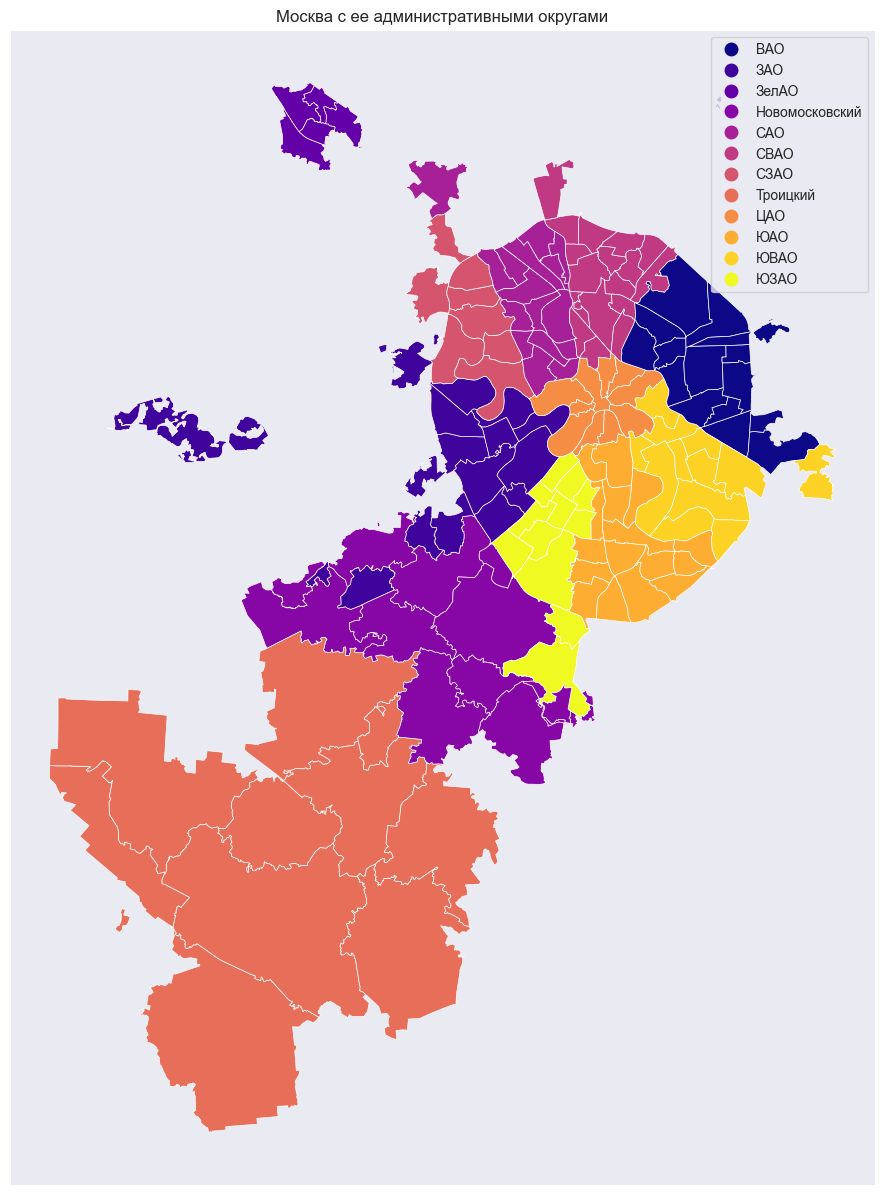

In [19]:
# показать Москву с ее административными округами.
mo_gdf_wm = mo_gdf.to_crs(epsg='3857')
mo_gdf_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])
plt.xticks([])
plt.yticks([])
plt.title("Москва с ее административными округами")
plt.show()

In [20]:
# определяем автономный район в котором находится офис компании, выставившей вакансию, в случае вне Москвы ставим "Не в Москве"
for dataset in datasets:
    dataset["AO"] = dataset[["lat", "lon"]].apply(lambda row: preprocess.find_AO(row, mo_gdf), axis=1)

In [21]:
# оставить только вакансии из Москвы или с удаленной работой в графике.
in_moscow_or_remote = []
for dataset in datasets:
    filtered_dataset = dataset.loc[(dataset["AO"] != "Не в Москве") | (dataset["schedule"] == "Удаленная работа")]
    in_moscow_or_remote.append(filtered_dataset.reset_index(drop=True))


In [22]:
in_moscow_or_remote[0].describe()

,salary,stations_within_km,distance_to_the_nearest(m),lat,lon
count,1543.000000,912.000000,912.000000,923.000000,923.000000
mean,119373.609106,2.985746,609.875958,55.710454,37.663541
std,86981.714600,2.590791,728.601451,0.496301,1.747924
min,200.000000,0.000000,0.000000,44.815746,6.200109
25%,60000.000000,1.000000,310.493518,55.708359,37.543327
50%,91350.000000,2.000000,532.008479,55.749646,37.607862
75%,150000.000000,4.000000,761.291476,55.786060,37.653033
max,775000.000000,11.000000,15270.419439,58.592974,61.369154


In [23]:
for dataset in in_moscow_or_remote:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     1543 non-null   bool   
 1   has_test                    1543 non-null   bool   
 2   response_letter_required    1543 non-null   bool   
 3   salary                      1543 non-null   float64
 4   trusted_employer            1543 non-null   bool   
 5   schedule                    1543 non-null   object 
 6   accept_temporary            1543 non-null   bool   
 7   accept_incomplete_resumes   1543 non-null   bool   
 8   experience                  1543 non-null   object 
 9   employment                  1543 non-null   object 
 10  is_adv_vacancy              1543 non-null   bool   
 11  industry                    1543 non-null   object 
 12  stations_within_km          912 non-null    float64
 13  distance_to_the_nearest(m)  912 n

Я имею 7 bool колонок, 5 скалярные колонки и 5 категориальные

Для заполнения пустых значений в столбцах stations_within_km, distance_to_the_nearest(m) возьму моду и медиану соотвественно.

In [24]:
# заполнение пустых ячеек фрейма
for dataset in in_moscow_or_remote:
    dataset["lat"] = dataset["lat"].fillna(dataset["lat"].median())
    dataset["lon"] = dataset["lon"].fillna(dataset["lon"].median())
    dataset["stations_within_km"] = dataset["stations_within_km"].fillna(dataset["stations_within_km"].mode().iloc[0])
    dataset["distance_to_the_nearest(m)"] = dataset["distance_to_the_nearest(m)"].fillna(dataset["distance_to_the_nearest(m)"].median())

In [25]:
in_moscow_or_remote[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     1543 non-null   bool   
 1   has_test                    1543 non-null   bool   
 2   response_letter_required    1543 non-null   bool   
 3   salary                      1543 non-null   float64
 4   trusted_employer            1543 non-null   bool   
 5   schedule                    1543 non-null   object 
 6   accept_temporary            1543 non-null   bool   
 7   accept_incomplete_resumes   1543 non-null   bool   
 8   experience                  1543 non-null   object 
 9   employment                  1543 non-null   object 
 10  is_adv_vacancy              1543 non-null   bool   
 11  industry                    1543 non-null   object 
 12  stations_within_km          1543 non-null   float64
 13  distance_to_the_nearest(m)  1543 

### EDA и визуал

Для понимания основных тенденций надо исключить выбросы, так например один бухгалтер с зарплатой 85 млн может помешать увидеть закономерности в графике зарплат

<img alt="Alt text" height="800" src="images\outlier_example.jpg" width="1000"/>{}

In [26]:
# удаление выбросов, чтобы они не влияли на визуализацию.
dataset_without_outliers = []
for dataset in in_moscow_or_remote:
    q_low = dataset["salary"].quantile(0.01)
    q_hi  = dataset["salary"].quantile(0.99)
    dataset_without_outliers.append(dataset[(dataset["salary"] < q_hi) & (dataset["salary"] > q_low)].reset_index(drop=True))
    

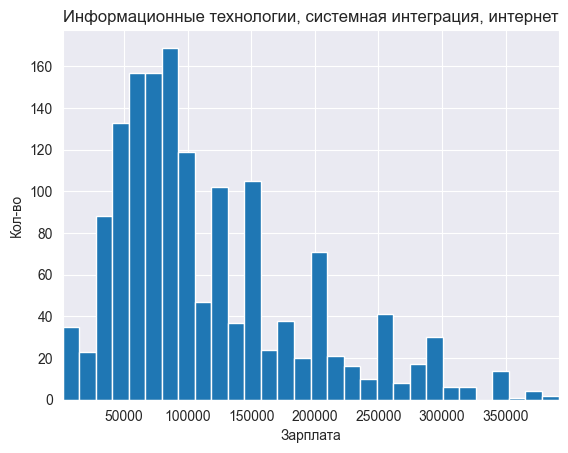

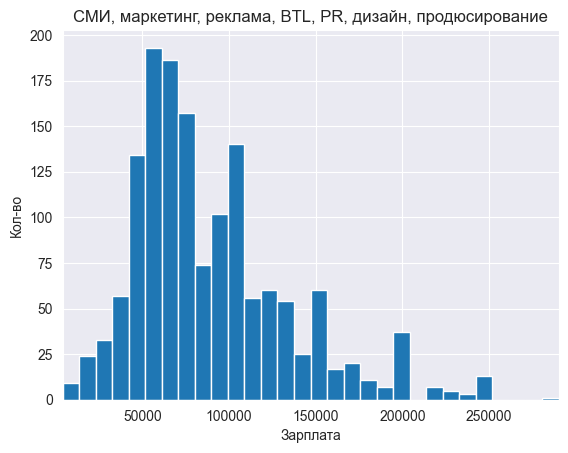

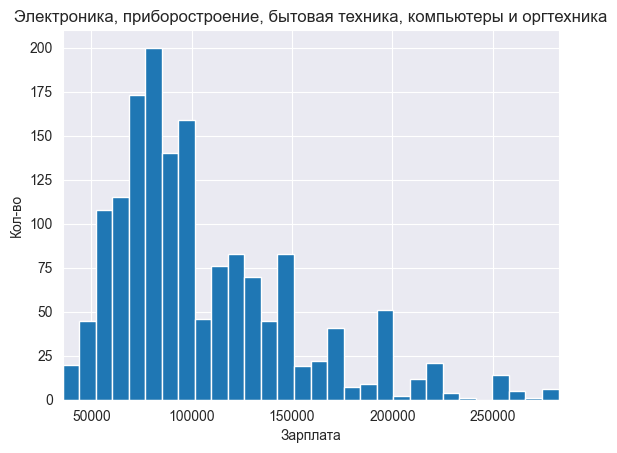

In [27]:
# построить гистограммы зарплат для каждой отрасли.
for dataset in dataset_without_outliers:
    plt.hist(dataset["salary"], 30)
    plt.title(dataset["industry"][0])
    plt.xlim((dataset["salary"].min(), dataset["salary"].max()))
    plt.xlabel("Зарплата")
    plt.ylabel("Кол-во")
    plt.show()

Видно, что графики слегка отличаются. Для более достоверного результата, можно проверить одинаковые ли зарплаты для работников разных отраслей с помощью статистических техник.

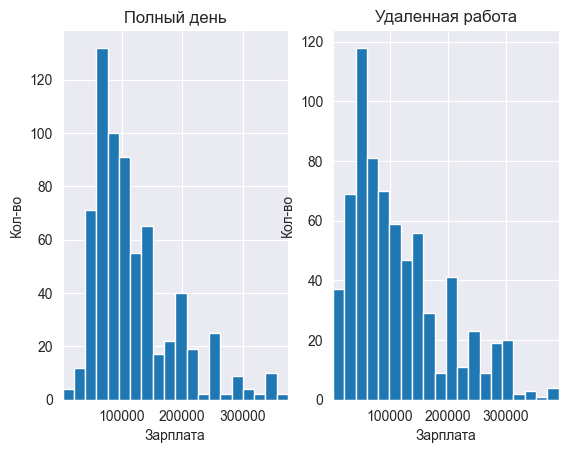

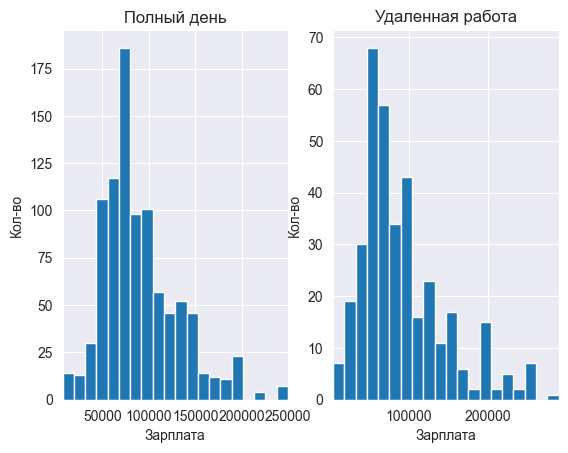

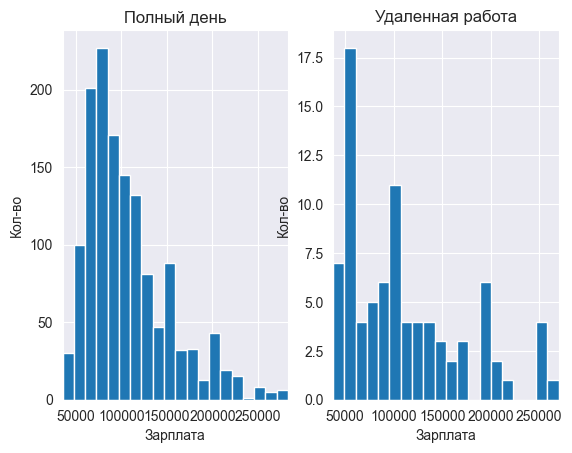

In [28]:
for dataset in dataset_without_outliers:
    in_office = dataset.loc[dataset["schedule"] == "Полный день", "salary"]
    out_office = dataset.loc[dataset["schedule"] == "Удаленная работа", "salary"]
    ax, fig = plt.subplots(ncols=2)
    fig[0].hist(in_office, 20)
    fig[0].set_title("Полный день")
    fig[0].set_xlim((in_office.min(), in_office.max()))
    fig[0].set_xlabel("Зарплата")
    fig[0].set_ylabel("Кол-во")
    fig[1].hist(out_office, 20)
    fig[1].set_title("Удаленная работа")
    fig[1].set_xlim((out_office.min(), out_office.max()))
    fig[1].set_xlabel("Зарплата")
    fig[1].set_ylabel("Кол-во")
    plt.show()

По графикам неочевидно, есть ли отличие между распределением зарплат тех, кто работает полный день в офисе и теми кто не делает так. Различия на графиках могут быть обусловлены особенностями выборки вакансий, поэтому статистический анализ необходим для более точного определения существующих различий или их отсутствия между заработными платами удаленных работников и тех, кто работает в офисе на полный рабочий день.

In [29]:
dataset_without_outliers[0]["AO"].value_counts()

AO
Не в Москве       601
ЦАО               281
ЮАО               133
СВАО               96
САО                96
ЗАО                77
ЮЗАО               59
ЮВАО               55
ВАО                42
СЗАО               34
Новомосковский     24
ЗелАО               2
Троицкий            1
Name: count, dtype: int64

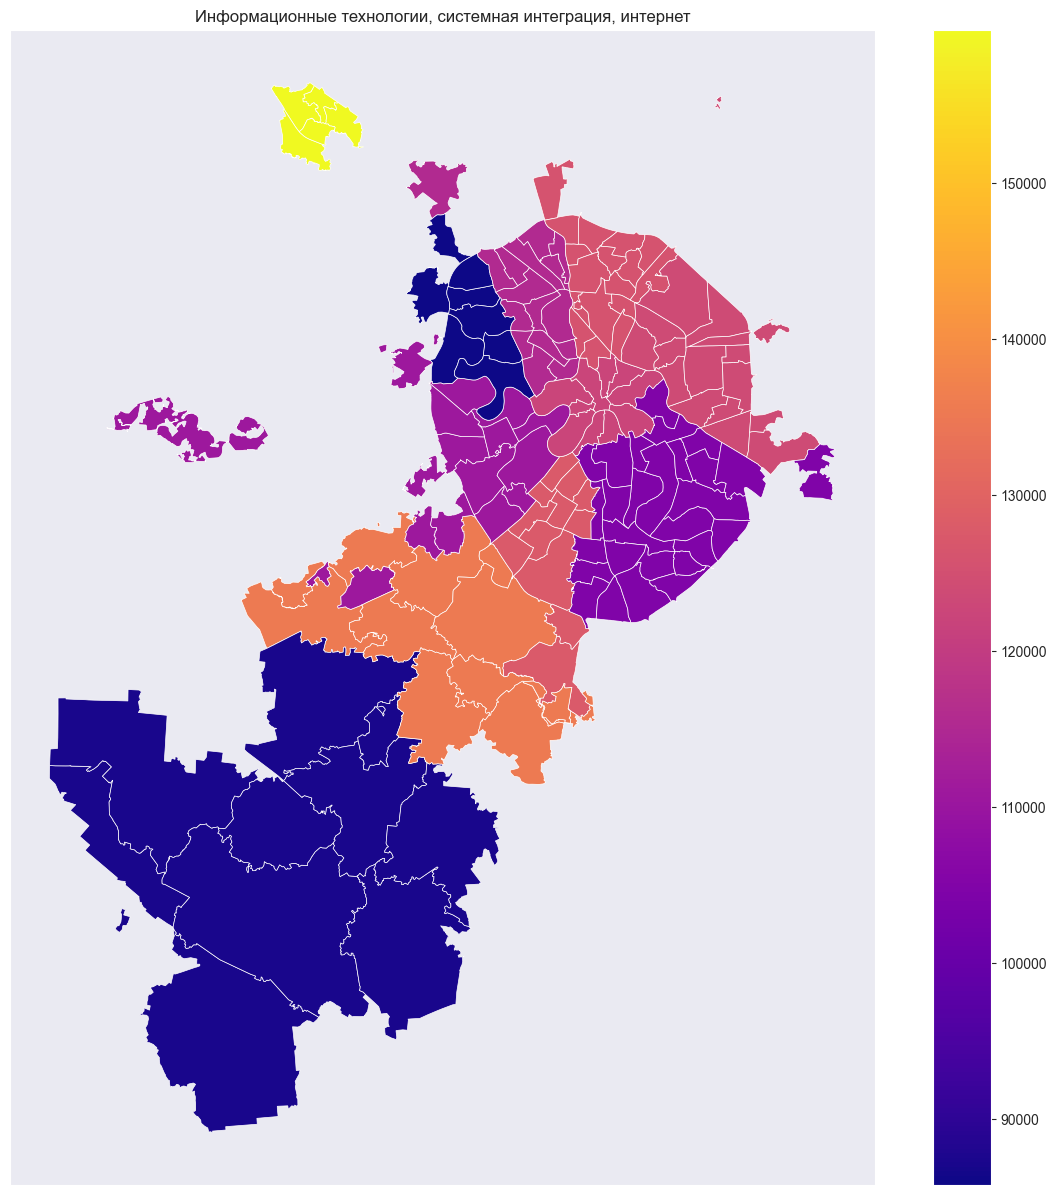

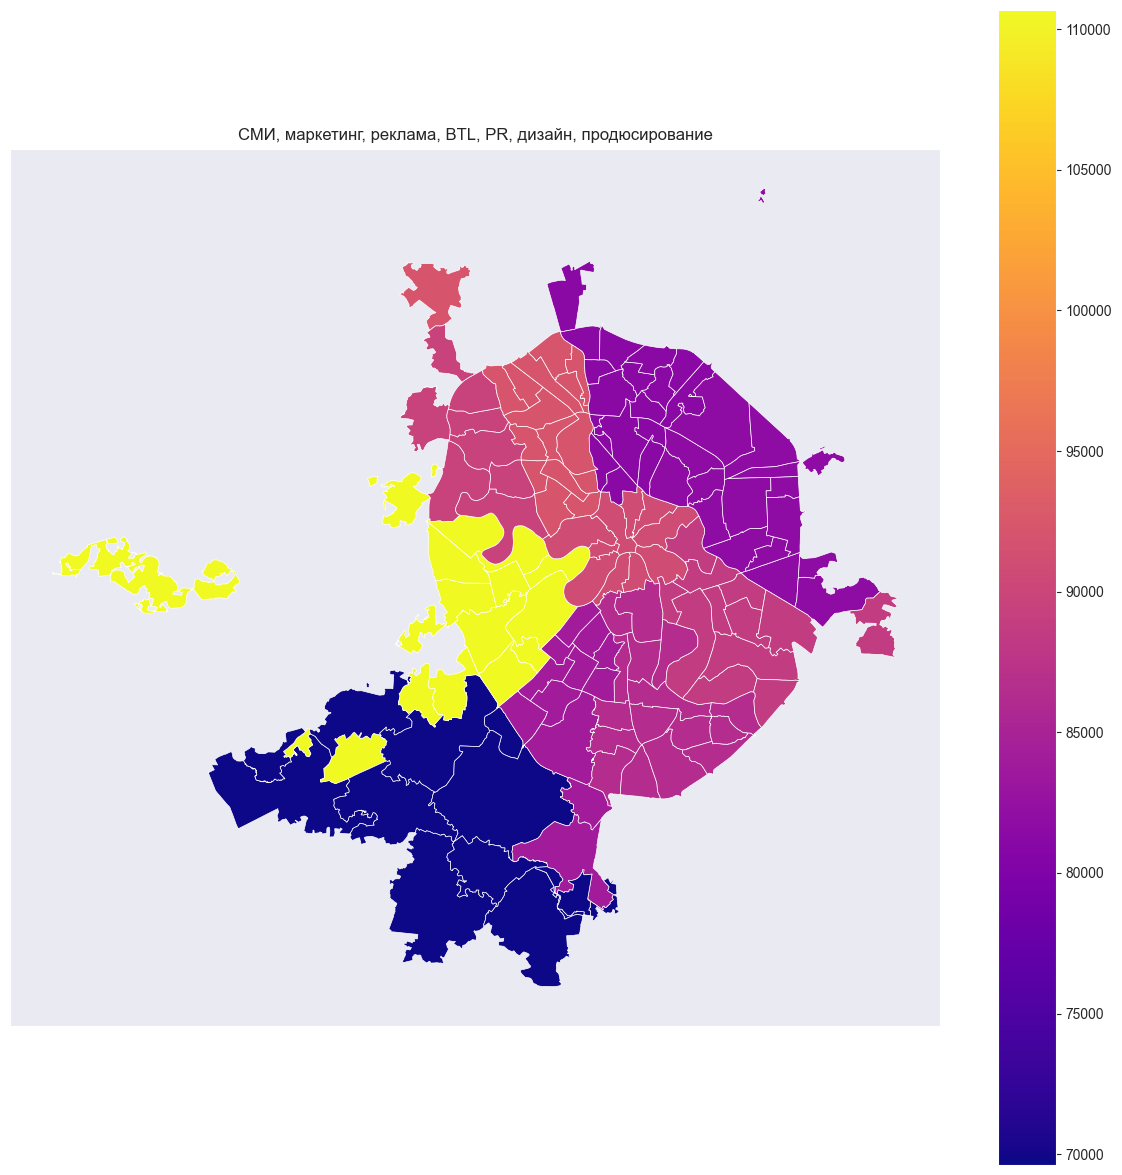

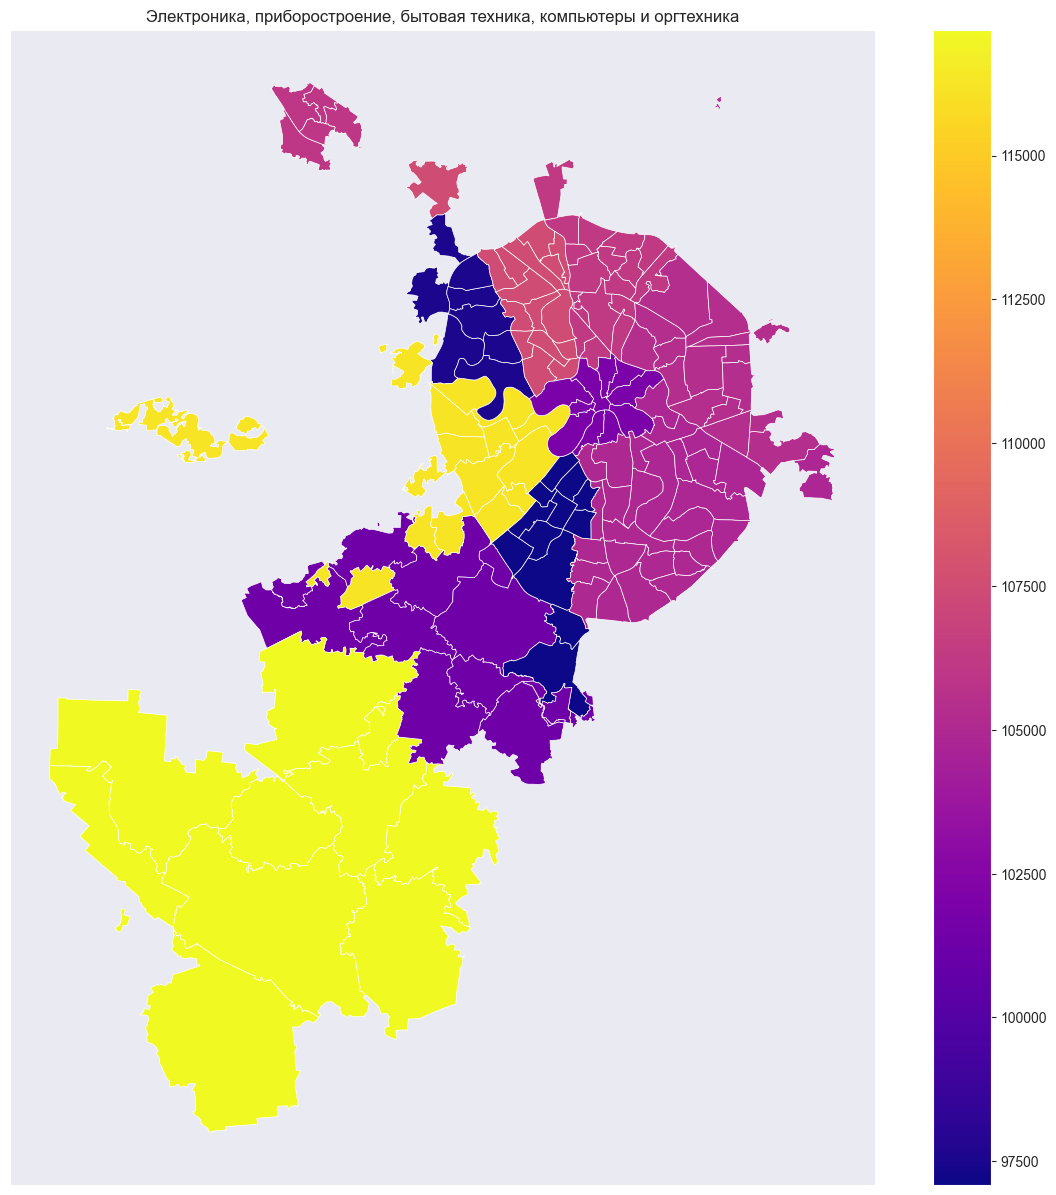

In [30]:
for dataset in dataset_without_outliers:
    adm_districts_avg_salaries = {
    "ЦАО": 0,
    "ЮАО": 0,
    "ЮВАО": 0,
    "САО": 0,
    "ЗАО": 0,
    "СВАО": 0,
    "ВАО": 0,
    "Новомосковский": 0,
    "ЮЗАО": 0,
    "СЗАО": 0,
    "ЗелАО": 0,
    "Троицкий": 0,
    "Не в Москве": 0
    }
    for ao in adm_districts_avg_salaries.keys():
        adm_districts_avg_salaries[ao] = dataset.loc[dataset["AO"] == ao, "salary"].mean()
    df_to_salary = mo_gdf[["ABBREV_AO", "geometry"]]
    df_to_salary["avg_salary"] = pd.Series(df_to_salary["ABBREV_AO"].apply(lambda x: adm_districts_avg_salaries[x]))
    salaries = df_to_salary.to_crs(epsg='3857') #непосредственно преобразование проекции
    salaries.plot(column = 'avg_salary', linewidth=0.5, cmap='plasma', legend=True, figsize=[15,15])
    plt.title(dataset["industry"][0])
    plt.xticks([])
    plt.yticks([])
    plt.show()

Зарплата в Москве может отличаться в разных районах и по разным видам работы. Например, в центре города или в IT-сфере она обычно выше, чем в спальных районах или в сфере обслуживания. Поэтому, чтобы понять, сколько можно заработать, нужно учитывать как район, так и вид работы. Так мы можем получить более точную картину и сделать правильные выводы о зарплате в Москве.

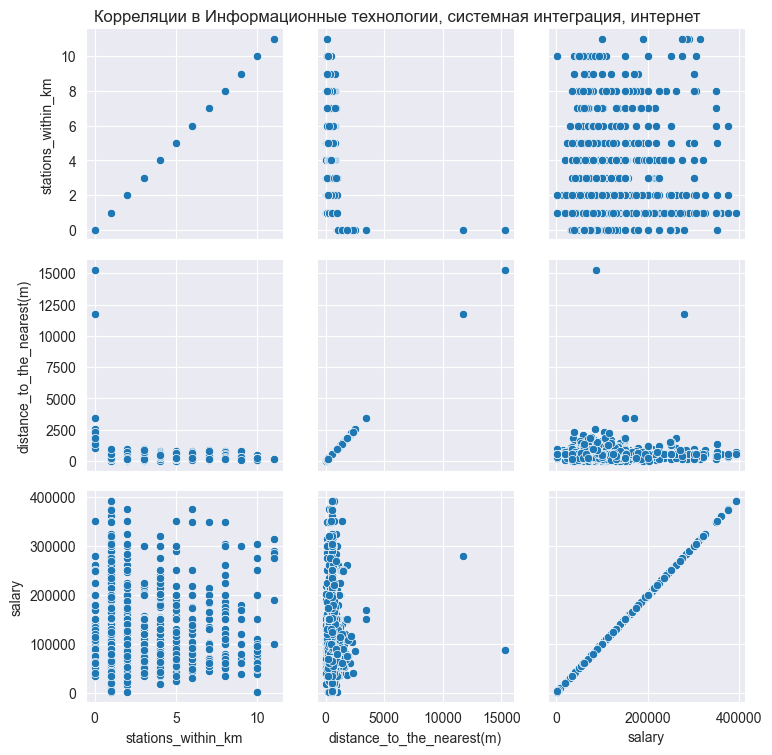

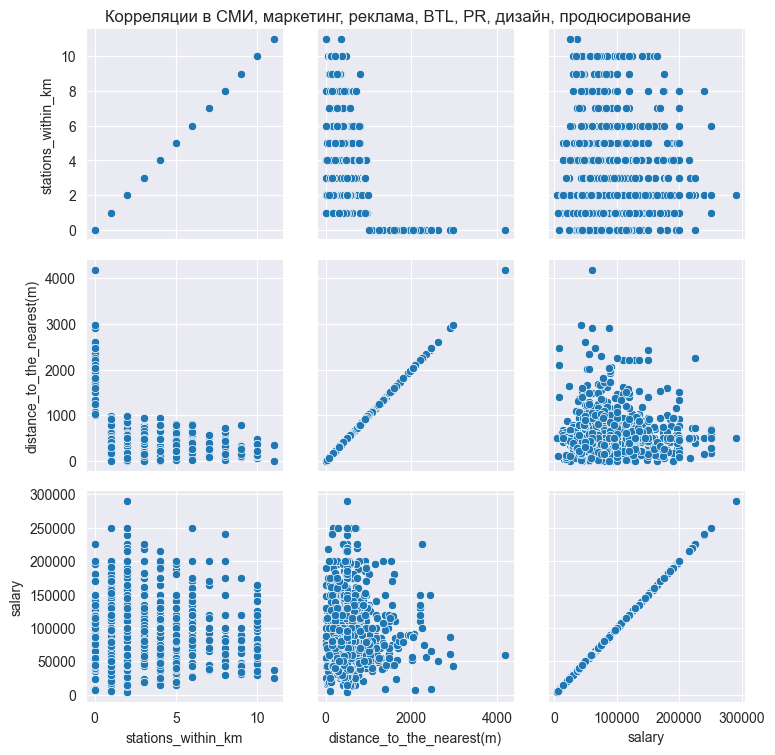

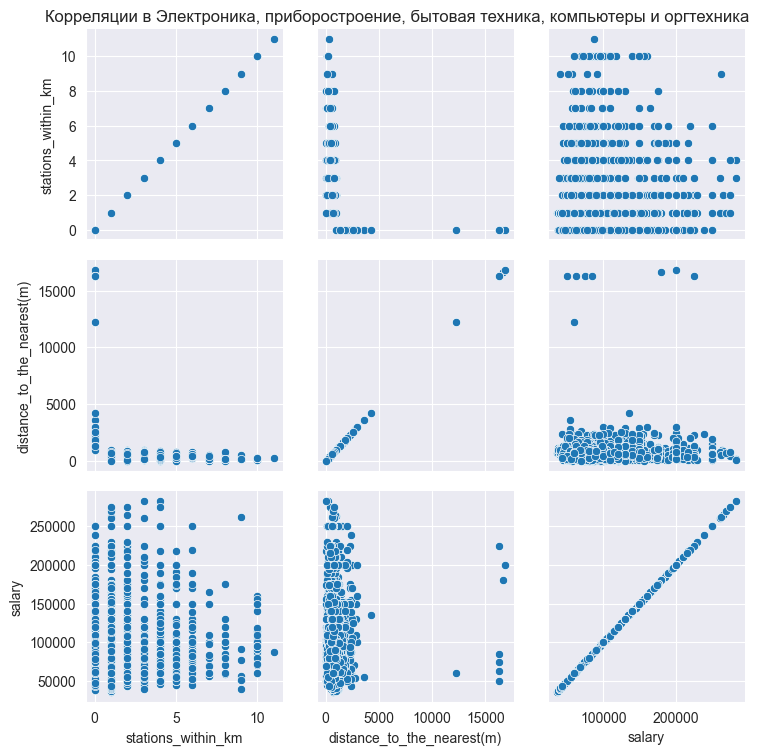

In [31]:
# ищем корреляцию между кол-вом станций, расстоянием до ближайшей станции и зарплатой, используя PairGrid
for dataset in dataset_without_outliers:
    industry = dataset["industry"][0]
    
    pg = sns.PairGrid(dataset[["stations_within_km", "distance_to_the_nearest(m)", "salary"]])
    pg.figure.suptitle(f"Корреляции в {industry}", y=1)
    pg.map(sns.scatterplot)
    

Отсутствие заметной корреляции может быть объяснено тем, что мы не наблюдаем определенного паттерна точек на графике, который бы указывал на сильную связь между параметрами. В основном, вакансии имеют значение расстояния от 0 до 2000 метров от ближайшей станции, но это скорее связано с тем, какие вакансии входили в выборку, чем с реальной зависимостью. Если в радиусе 1 км нет метро, то ближайшая станция может быть далеко, что кажется логичным.

Теперь можно посмотреть, люди с каким опытом требуются в разные индустрии. И зависит ли зарплата от опыта работы? Скорее всего зависит, но это нужно проверить.

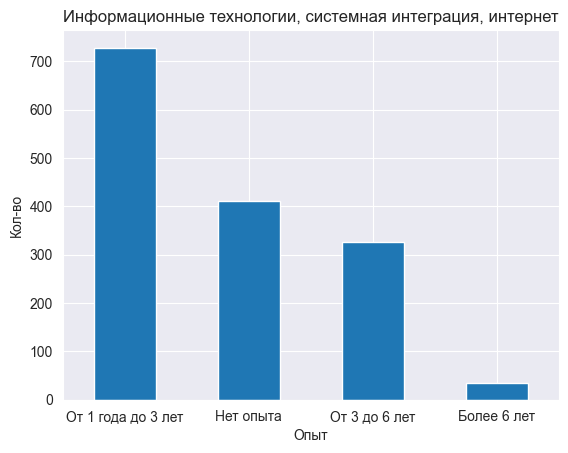

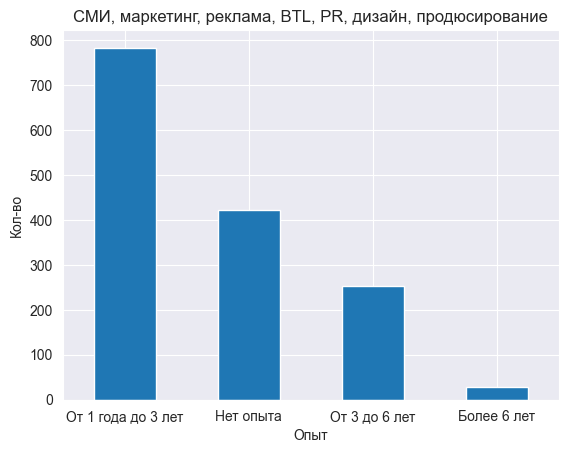

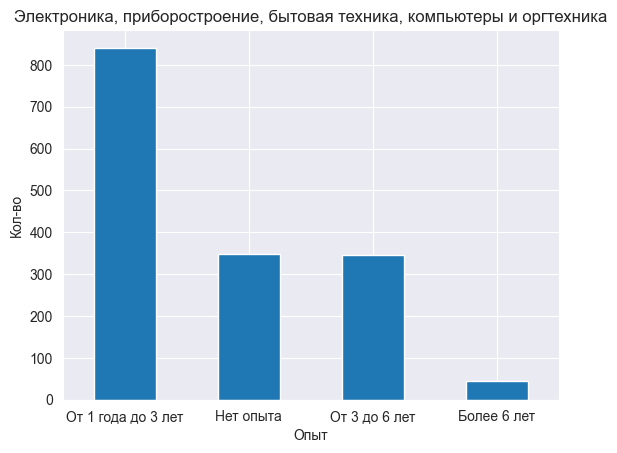

In [44]:
for dataset in dataset_without_outliers:
    exp = {
        "Нет опыта": 0,
        "От 1 года до 3 лет": 0,
        "От 3 до 6 лет": 0,
        "Более 6 лет": 0
    }
    dataset["experience"].value_counts().plot.bar(rot=0)
    plt.title(dataset["industry"][0])
    plt.ylabel("Кол-во")
    plt.xlabel("Опыт")
    plt.show()

По распределению столбцов видно, что большинство вакансий расчитаны на опыт от 1 года до 3 лет, более опытные сотрудники 

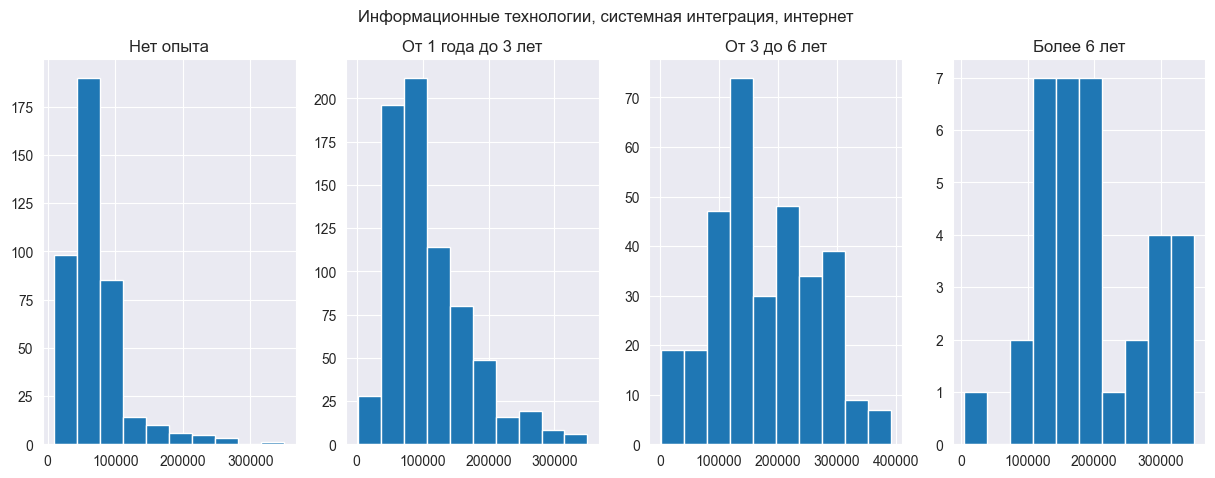

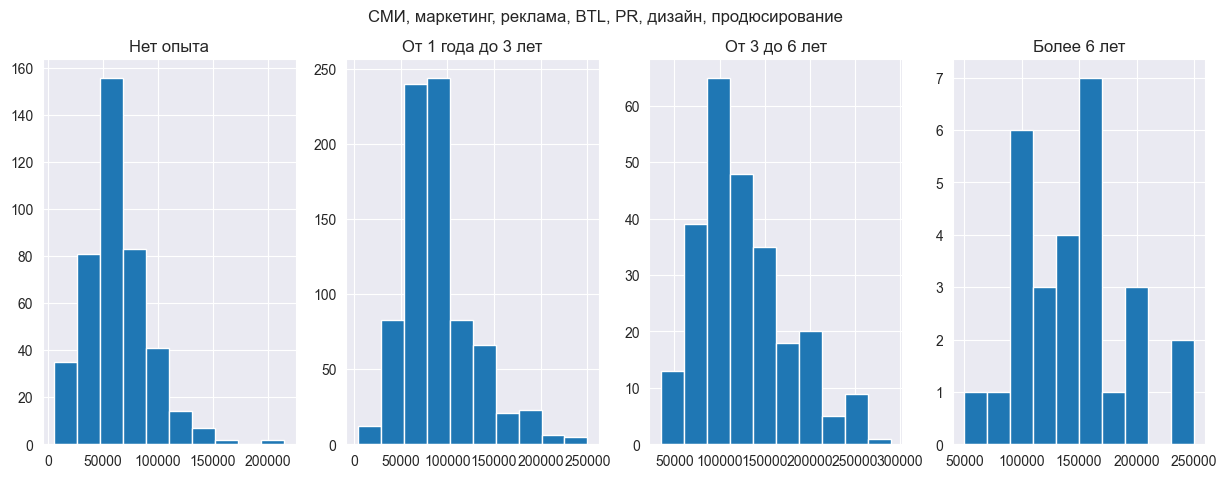

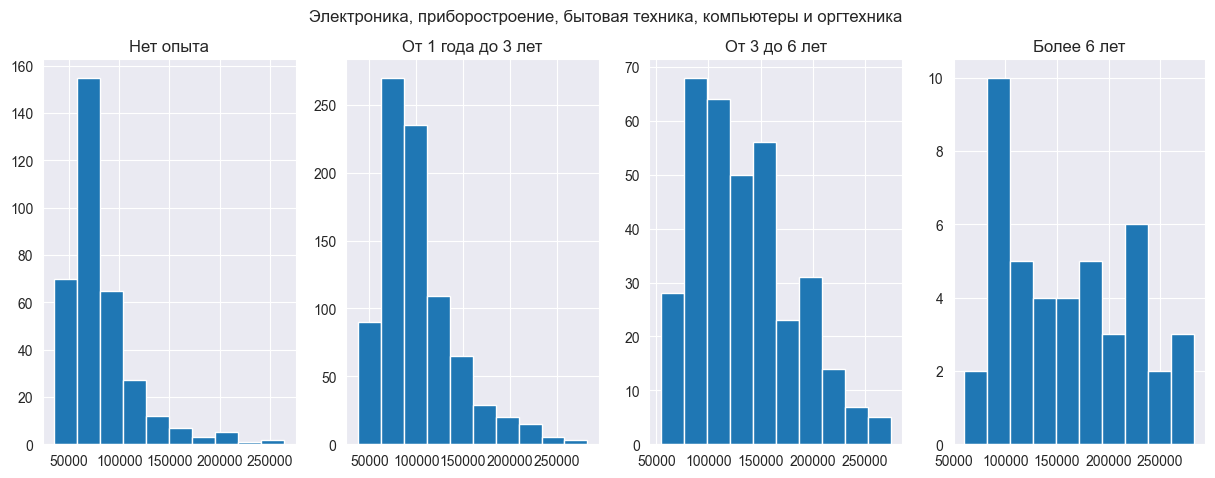

In [57]:
for dataset in dataset_without_outliers:
    _, fig = plt.subplots(ncols=4, figsize=[15,5])
    for i, exp in enumerate(["Нет опыта", "От 1 года до 3 лет", "От 3 до 6 лет", "Более 6 лет"]):
        fig[i].hist(dataset.loc[dataset["experience"]==exp, "salary"], label=exp)
        fig[i].set_title(exp)
    plt.suptitle(dataset["industry"][0])
    plt.show()

Видно,что есть тенденция к увеличению средней зарплаты с большим опытом. Притом в Информационных технологиях и СМИ-маркетинге такая тенденция сохраняется. А в электронике категории 3-6 лет опыта и от 6 лет опыта примерно одинаковые зарплаты.

Булевские переменные

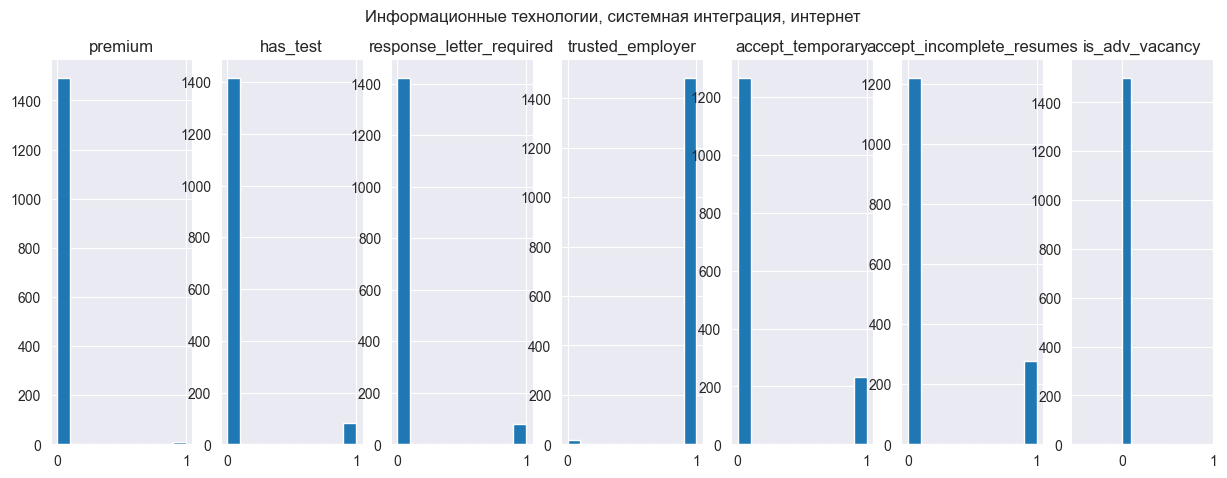

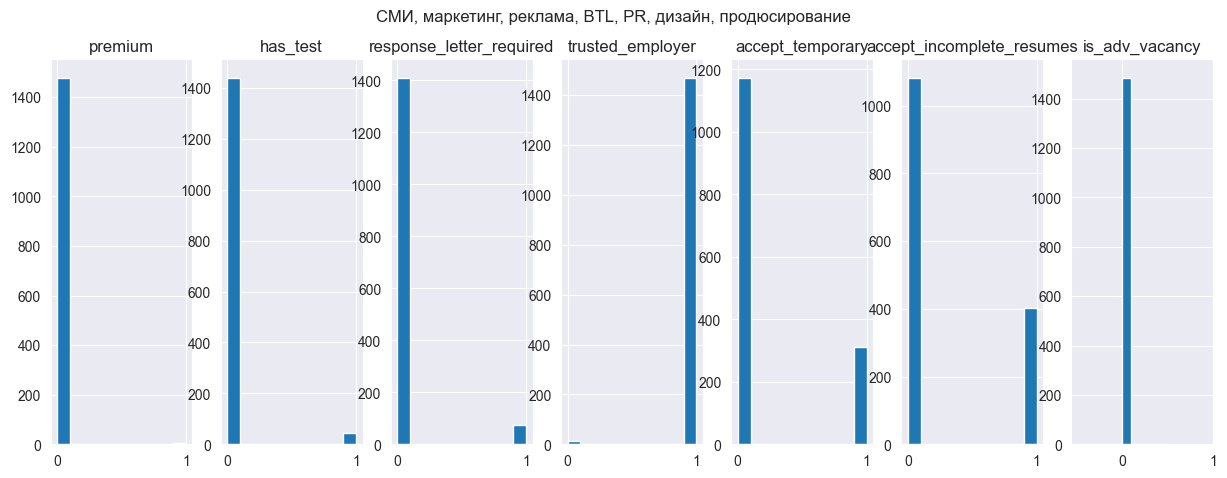

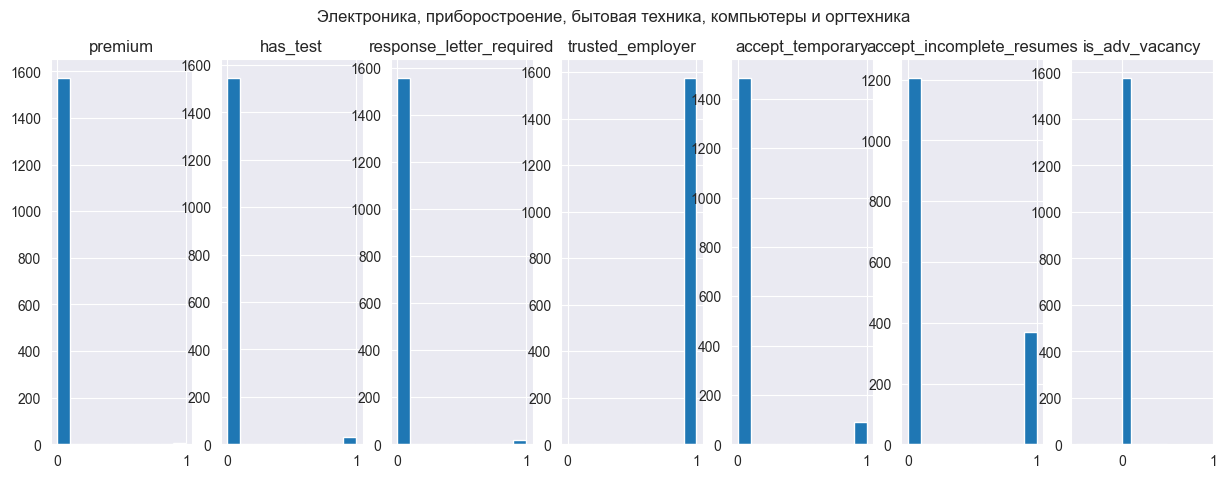

In [61]:
bool_cols = []
for col in dataset_without_outliers[0].columns:
    if dataset_without_outliers[0][col].dtype == bool:
        bool_cols.append(col)
for dataset in dataset_without_outliers:
    _, fig = plt.subplots(ncols=len(bool_cols), figsize=[15,5])
    for i, col in enumerate(bool_cols):
        fig[i].hist(dataset[col].apply(lambda x: 1 if x else 0))
        fig[i].set_xticks([0, 1])
        fig[i].set_title(col)
    plt.suptitle(dataset["industry"][0])
    plt.show()

Как видно из графиков большинство булевских переменных не сбалансированы, недостаточно наблюдений, чтобы будущая модель по этим параметрам умела предсказывать нужную зарплату на вакансию. В ходе статистического анализа надо проверить значимость этих параметров на итоговую зарплату. В случае, когда данные являются незначительными, следует удалить данные колонки во избежании ошибок в прогнозировании.

Последняя колонка для рассмотрения это employment

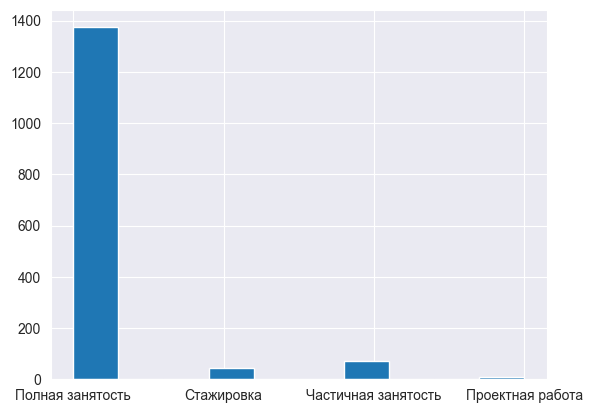

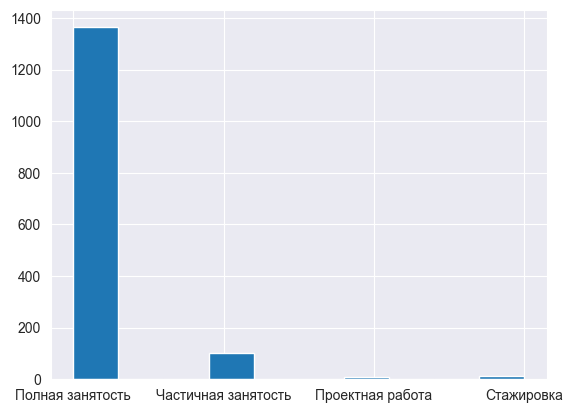

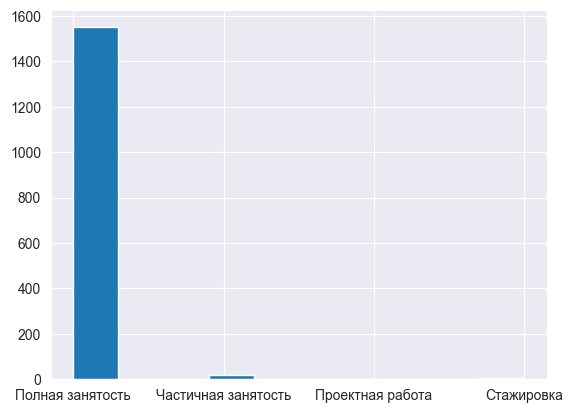

In [62]:
for dataset in dataset_without_outliers:
    plt.hist(dataset["employment"])
    plt.show()

Как видно большая часть вакансий ориентирована на полную занятость. Вероятно, придется удалить и эту колонку тоже. 

### Статистический анализ